<a href="https://colab.research.google.com/github/gmrdns03/MachineLearning_Minkyo/blob/main/OR_%EA%B2%8C%EC%9D%B4%ED%8A%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OR 게이트 구현해보기

0,0 -> 0

0, 1 -> 1

1, 0 -> 1

1, 1 -> 1

## 기본 라이브러리 임포트

In [1]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)  # 실행할 때 마다 같은 방법으로 학습하도록 시드를 고정시킨다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

## 데이터 준비하기

In [2]:
# 데이터 준비하기
data = np.array([[0,0], [1,0], [0,1], [1,1]])  # OR 연산 학습 데이터
# label = np.array([[0], [1], [1], [1]])  # 정답 OR연산
label = np.array([[0], [1], [1], [0]]) # 정답 XOR연산

## 모델 구성하기

In [3]:
model = Sequential()  # 신경망들을 순서대로 쌓아야 함
model.add(Dense(1, input_shape=(2,), activation='linear'))  # 단층 퍼셉트론 구성
# '1'은 퍼셉트론 의개수 또는 은닉 유닛이라고 표현
# 
# model.add() 를 이용해 쌓기
# 1층으로 쌓기 model.add를 하나만 써서
# activation='linear' 활성화 함수를 선형으로 가져옴

# 텐서플로우에서는 덴스의 속성을 여러 방법으로 층을 만들 수 있다.

In [4]:
model.compile(optimizer= SGD(), loss=mse, metrics=['acc'])
# metrics=['acc'] -> 학습할 때마다 몇점인지 알려줌
# loss=mse -> 손실을 민 시퀀셜 에

In [5]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


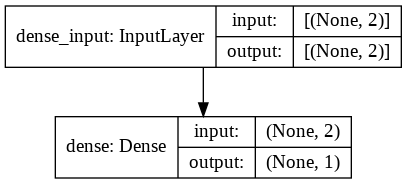

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


## 모델 학습시키기

In [7]:
history = model.fit(data, label, epochs=200)  # 학습데이터, 정답, 공부횟수입력
# epochs= 몇번 학습시킬지
# loss가 점점 높아지면 학습이 안되고 있다는 것
# loss가 점점 줄어드는 것을 항상 확인해야 한다.
# acc가 1.00이라는것은 100퍼 맞춘다는 것

# 기본적으로 100번정도 실행시켜보고 어떻게 되는지 확인하고
# 500번 정도 시켜서 양상을 확인해서 더 시킬지 말지를 결정

Epoch 1/200
1/1 [==============================] - 0s 286ms/step - loss: 0.9969 - acc: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9642 - acc: 0.7500
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 0.9334 - acc: 0.7500
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9043 - acc: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.8770 - acc: 0.7500
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.8512 - acc: 0.7500
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.8270 - acc: 0.7500
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.8041 - acc: 0.7500
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7825 - acc: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7621 - acc: 0.7500
Epoch 11/200
1/1 [==============================] - 0s 8ms/step - loss: 0.742

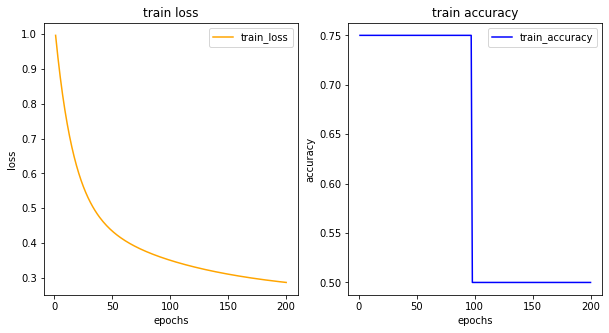

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


# 손실함수가 틀린 것들을 보정해주면서 떨어지고 정확도는 올라간다.
# 손실값이 더 떨어질 수 있을 지, 정확도가 100퍼에 얼마나 근접한지 확인

### 모델 가중치 확인하기

In [9]:
model.get_weights()
# 어느 특성에 가중치를 둬서 학습을 시켰는지를 확인할 수 있다.

[array([[ 0.30263716],
        [-0.23174001]], dtype=float32), array([0.45685056], dtype=float32)]

## 모델 예측하기

In [10]:
result = model.predict(data)
print(result)

# 값에 대해 예측한 것은 확률 처럼 나온다.

[[0.45685056]
 [0.75948775]
 [0.22511055]
 [0.5277477 ]]


In [11]:
result = model.predict_classes(data)
print(result)


[[0]
 [1]
 [0]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
